In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from timeit import default_timer as timer
from tqdm.auto import tqdm

In [12]:
transform_train = transforms.Compose([
    # transforms.RandomCrop(32, padding=4),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_data = datasets.CIFAR10(root="../datasets/data", train=True, download=True, 
                              transform=transform_train, target_transform=None)

test_data = datasets.CIFAR10(root="../datasets/data", train=False, download=True, 
                              transform=transform_test, target_transform=None)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
len(train_data), len(test_data)

(50000, 10000)

In [14]:
image, label = train_data[0]
image, label

(tensor([[[-1.2854e+00, -1.5955e+00, -1.4598e+00,  ...,  6.3375e-01,
            5.1744e-01,  4.3990e-01],
          [-2.1189e+00, -2.4291e+00, -2.0801e+00,  ..., -4.4721e-02,
           -1.2226e-01, -6.4106e-02],
          [-1.9444e+00, -2.1189e+00, -1.4792e+00,  ..., -1.4165e-01,
           -1.0288e-01, -3.1611e-01],
          ...,
          [ 1.6030e+00,  1.4673e+00,  1.4091e+00,  ...,  6.7252e-01,
           -1.3435e+00, -1.4017e+00],
          [ 1.0602e+00,  9.2452e-01,  1.1765e+00,  ...,  1.1378e+00,
           -5.4873e-01, -8.2012e-01],
          [ 1.0021e+00,  8.2760e-01,  1.0408e+00,  ...,  1.7581e+00,
            4.9806e-01, -4.4721e-02]],
 
         [[-1.1989e+00, -1.5136e+00, -1.4742e+00,  ...,  1.7777e-01,
            4.0101e-02,  2.0434e-02],
          [-2.0249e+00, -2.4183e+00, -2.2609e+00,  ..., -6.8757e-01,
           -7.8591e-01, -7.0724e-01],
          [-1.9463e+00, -2.2806e+00, -1.8873e+00,  ..., -7.6624e-01,
           -7.6624e-01, -9.8258e-01],
          ...,
    

In [15]:
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [16]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [17]:
train_data.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [18]:
print(f"Image shape: {image.shape} -> [color_channel, height, width]")
print(f"lable: {class_names[label]}")

Image shape: torch.Size([3, 32, 32]) -> [color_channel, height, width]
lable: frog


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


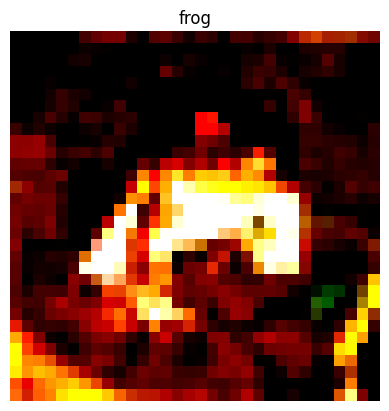

In [19]:
# Convert the image tensor to numpy array and transpose it
image_np = image.numpy().transpose((1, 2, 0))

# Display the image
plt.imshow(image_np)
plt.title(class_names[label])
plt.axis('off')  # Turn off axis
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

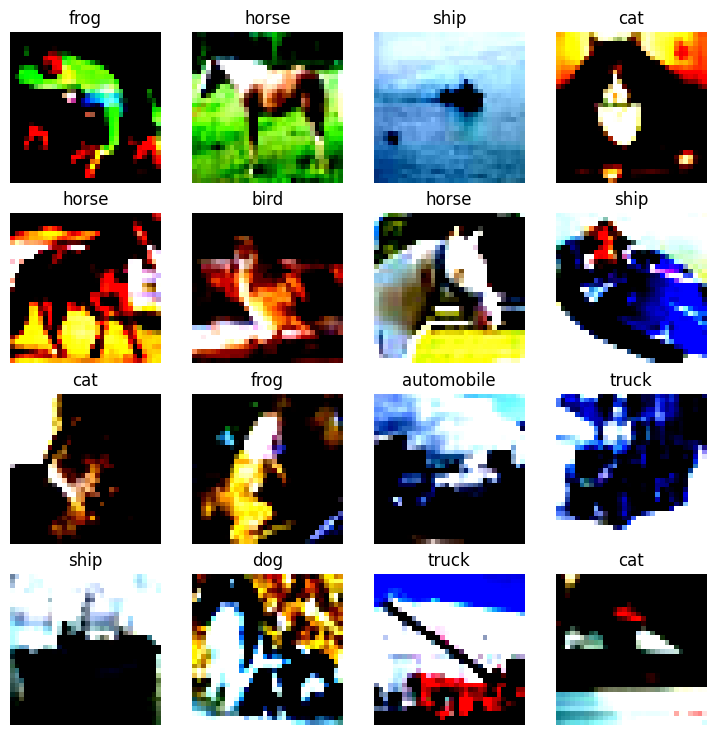

In [20]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    rnd_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[rnd_idx]
    img_np = img.numpy().transpose((1, 2, 0))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img_np)
    plt.title(class_names[label])
    plt.axis(False)

In [21]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../datasets/data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [22]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../datasets/data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [23]:
# dataloader turns dataset to python iterable
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE)

len(train_dataloader), len(test_dataloader)

(1563, 313)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


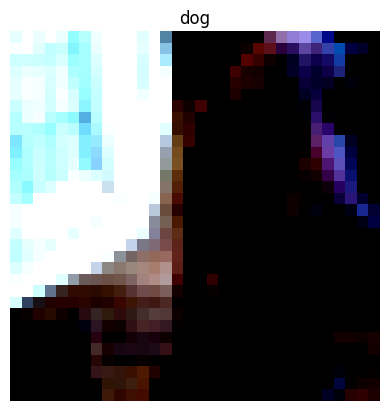

In [24]:
# torch.manual_seed(42)
train_ftr_batch, train_labels_batch = next(iter(train_dataloader))
rnd_idx = torch.randint(0, len(train_ftr_batch), size=[1]).item()
img, label = train_ftr_batch[rnd_idx], train_labels_batch[rnd_idx]

# Convert the image tensor to numpy array and transpose it
image_np = img.numpy().transpose((1, 2, 0))

# Display the image
plt.imshow(image_np)
plt.title(class_names[label])
plt.axis('off')  # Turn off axis
plt.show()

In [25]:
train_ftr_batch.shape, train_labels_batch

(torch.Size([32, 3, 32, 32]),
 tensor([4, 0, 5, 5, 5, 1, 8, 7, 1, 4, 5, 9, 5, 1, 7, 4, 1, 4, 0, 6, 1, 5, 3, 1,
         5, 5, 7, 7, 8, 4, 8, 0]))

In [26]:
flatten_model = nn.Flatten()

x = train_ftr_batch[0]

output = flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([3, 32, 32])
Shape after flattening: torch.Size([3, 1024])


In [27]:
class CIFAR10MODELV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)
        

In [28]:
model_0 = CIFAR10MODELV0(
    input_shape=3*1024, #32*32
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')
model_0

CIFAR10MODELV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [29]:
dummy_x = torch.rand([1, 3, 32, 32])
model_0(dummy_x)

tensor([[ 0.1161, -0.1393,  0.2062,  0.0124,  0.0991, -0.0929, -0.0534, -0.2793,
          0.1424, -0.0151]], grad_fn=<AddmmBackward0>)

In [30]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [32]:
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end - start
    print(f"Time needed {total_time}")

In [33]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start_time, end_time, 'cpu')

Time needed 4.049998824484646e-05


In [24]:
torch.manual_seed(42)
train_time_start = timer()

EPOCHS = 10

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n-----")
    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            # print(y_pred)

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred, y_test)

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /=len(test_dataloader)

        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}\n")

train_time_end = timer()

total_train_time_model_0 = print_train_time(start=train_time_start,
                                            end=train_time_end,
                                            device='cpu')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/50000 samples
tensor([[ 1.2838e-01, -2.3824e-01,  2.8048e-01,  2.7730e-02,  1.5059e-01,
          9.4558e-02, -1.3501e-01, -3.2128e-01,  1.0192e-01, -8.1009e-02],
        [ 1.3032e-01, -4.2216e-01,  2.5842e-01,  1.9500e-02,  1.2939e-02,
          8.3424e-02, -2.9680e-02, -1.9180e-01,  7.8717e-02, -3.8958e-02],
        [ 6.8108e-02, -3.0491e-01,  3.4324e-01, -3.7930e-02,  2.8143e-02,
          6.3697e-02, -1.9589e-01, -2.5449e-01,  3.4687e-02, -2.6610e-02],
        [ 2.4865e-01, -2.0350e-01,  2.3087e-01, -9.5498e-02,  2.5303e-01,
         -1.4423e-02, -1.1943e-01, -2.1965e-01,  2.2691e-01,  7.3648e-02],
        [ 7.5732e-02, -2.5728e-01,  3.6011e-01, -4.9262e-02,  6.2048e-02,
          5.4815e-02, -2.6291e-01, -2.7822e-01,  3.9056e-02, -2.6451e-02],
        [ 1.6209e-01,  4.0053e-02,  1.2661e-01,  1.0243e-01,  2.1230e-01,
          3.4150e-02, -1.8473e-01, -9.8621e-02,  1.9103e-01,  4.4335e-02],
        [ 2.0038e-01, -2.1363e-02,  1.2147e-01, -1.7300e-03,  2.0